In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#import BanditProblems as bp

In [3]:
from gp_tk import RBF
from gp_tk import GP

In [4]:
gp = GP(mu_y=0.5, sigma=0.01, kernel=RBF(0.3, 0.01))

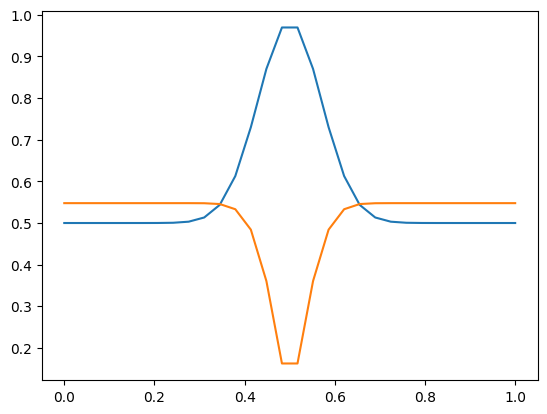

In [5]:
gp.append(0.5, 1)
x = np.linspace(0, 1, 30)
mean, var = gp.mean_var(x)
plt.plot(x, mean)
plt.plot(x, np.sqrt(var))

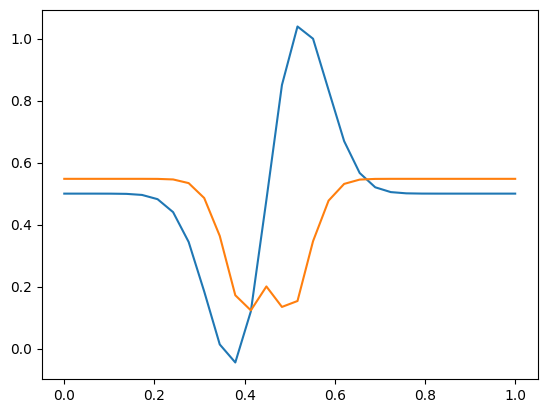

In [6]:
gp.append(0.4, 0)
x = np.linspace(0, 1, 30)
mean, var = gp.mean_var(x)
plt.plot(x, mean)
plt.plot(x, np.sqrt(var))

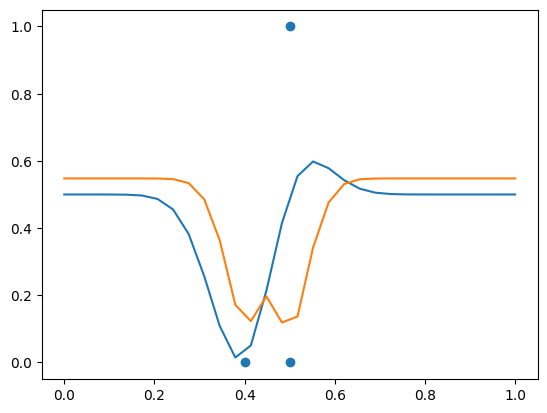

In [7]:
gp.append(0.5, 0)
x = np.linspace(0, 1, 30)
mean, var = gp.mean_var(x)
plt.plot(x, mean)
plt.plot(x, np.sqrt(var))
plt.scatter(gp._x, gp._y)

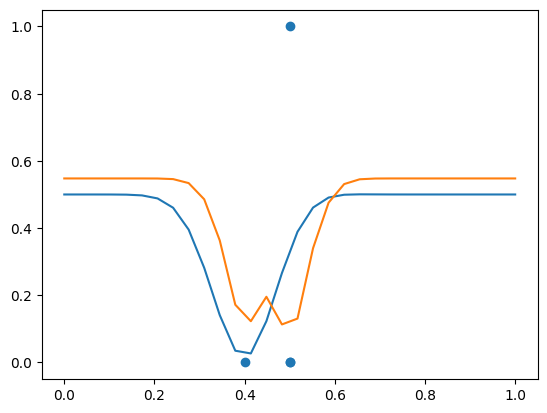

In [8]:
gp.append(0.5, 0)
x = np.linspace(0, 1, 30)
mean, var = gp.mean_var(x)
plt.plot(x, mean)
plt.plot(x, np.sqrt(var))
plt.scatter(gp._x, gp._y)

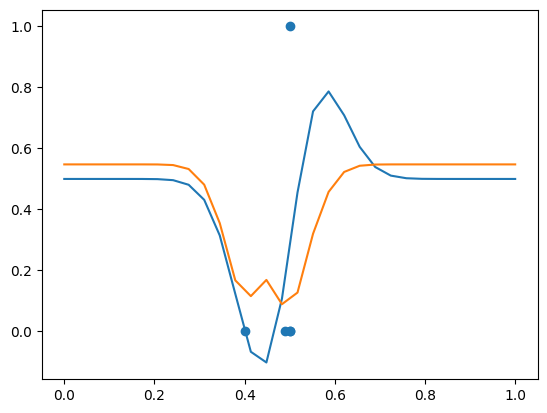

In [9]:
gp.append(0.49, 0)
x = np.linspace(0, 1, 30)
mean, var = gp.mean_var(x)
plt.plot(x, mean)
plt.plot(x, np.sqrt(var))
plt.scatter(gp._x, gp._y)

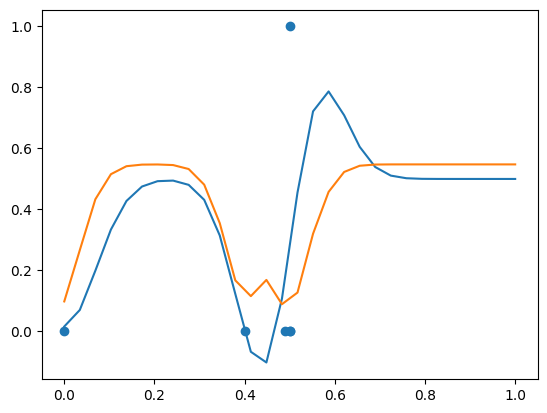

In [10]:
gp.append(0.0, 0)
x = np.linspace(0, 1, 30)
mean, var = gp.mean_var(x)
plt.plot(x, mean)
plt.plot(x, np.sqrt(var))
plt.scatter(gp._x, gp._y)